In [13]:
# Using Jupyter notebook in Python to preprocess the CSV file so it contains
# only the columns you need for 'covid_deceased' table from PostgreSQL
# This can only work if you run the entire SINGULAR script due to 
#...the attempt to perform file operations (read or write) on a file that has already been closed

import csv

# Specify the input and out file paths
# Ensure \\ in the file path, not window's typical "/"
input_file = 'C:\\Program Files\\PostgreSQL\\16\\data\\Data_copy\\CovidDeaths.csv'
output_file = 'C:\\Program Files\\PostgreSQL\\16\\data\\Data_copy\\CovidDeaths_preprocessed.csv'

# Define the columns to keep
columns_to_keep = ['location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'population']

# open the input and output CSV files
# 'r' and 'w' are used as modes; 'r' opens the input file and 'w' writes the modified data when output file is open
with open(input_file, 'r', newline='') as csv_in:
    reader = csv.DictReader(csv_in)

    with open(output_file, 'w', newline='') as csv_out:
        writer = csv.DictWriter(csv_out, fieldnames=columns_to_keep)
    
# modified_row is a variable to represent a row of data from input file
#...with missing values replaced by 'NULL'

            # Write the header to the output CSV
                writer.writeheader()

        # Process and write each row; Select only the columns to keep
        for row in reader:
            selected_row = {column: row[column] for column in columns_to_keep}
            writer.writerow(selected_row)


IndentationError: unexpected indent (697845035.py, line 28)

In [17]:
import csv

# Specify the input and output file paths
input_file = 'C:\\Program Files\\PostgreSQL\\16\\data\\Data_copy\\CovidDeaths_2020_2023.csv'
output_file = 'C:\\Program Files\\PostgreSQL\\16\\data\\Data_copy\\CovidDeaths_2020_2023_SQL.csv'

# Define the columns to keep
columns_to_keep = ['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases', 'total_deaths', 'population']

# Open the input and output CSV files
with open(input_file, 'r', newline='') as csv_in:
    reader = csv.DictReader(csv_in)
    
    with open(output_file, 'w', newline='') as csv_out:
        writer = csv.DictWriter(csv_out, fieldnames=columns_to_keep)
        
        # Write the header to the output CSV
        writer.writeheader()

        # Process and write each row; Select only the columns to keep
        for row in reader:
            selected_row = {column: row[column] for column in columns_to_keep}
            writer.writerow(selected_row)

In [19]:
import csv

# Specify the input and output file paths
input_file = 'C:\\Program Files\\PostgreSQL\\16\\data\\Data_copy\\owid-covid-data.csv'
output_file = 'C:\\Program Files\\PostgreSQL\\16\\data\\Data_copy\\Covid_Vacs_2020_2023_SQL.csv'

# Define the columns to keep
columns_to_keep = ['iso_code', 'continent','location', 'date', 'total_vaccinations', 'people_vaccinated', 'people_fully_vaccinated']

# Open the input and output CSV files
with open(input_file, 'r', newline='') as csv_in:
    reader = csv.DictReader(csv_in)
    
    with open(output_file, 'w', newline='') as csv_out:
        writer = csv.DictWriter(csv_out, fieldnames=columns_to_keep)
        
        # Write the header to the output CSV
        writer.writeheader()

        # Process and write each row; Select only the columns to keep
        for row in reader:
            selected_row = {column: row[column] for column in columns_to_keep}
            writer.writerow(selected_row)

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df_death_cases = pd.read_csv('CovidDeaths_totalcases_vs_death.csv')

In [10]:
df_death_cases.describe()

# Summary statistics

,total_cases,total_deaths,death_percentage
count,1.342000e+03,1342.000000,1342.000000
mean,1.285286e+07,154592.634873,0.298063
std,1.019257e+07,69318.402452,5.453401
min,1.000000e+00,1.000000,0.000000
25%,2.649209e+06,94282.500000,0.000000
50%,1.055918e+07,173149.000000,0.000000
75%,2.393175e+07,211675.750000,0.000000
max,2.474379e+07,229765.000000,100.000000


In [11]:
print(df_death_cases.head())

# check the first few rows

         location        date  total_cases  total_deaths  death_percentage
0  United Kingdom  2020-01-03          NaN           NaN               NaN
1  United Kingdom  2020-01-04          NaN           NaN               NaN
2  United Kingdom  2020-01-05          NaN           NaN               NaN
3  United Kingdom  2020-01-06          NaN           NaN               NaN
4  United Kingdom  2020-01-07          NaN           NaN               NaN


In [12]:
print(df_death_cases.tail())

# check the last few rows

            location        date  total_cases  total_deaths  death_percentage
1366  United Kingdom  2023-09-30   24743787.0      229765.0               0.0
1367  United Kingdom  2023-10-01   24743787.0      229765.0               0.0
1368  United Kingdom  2023-10-02   24743787.0      229765.0               0.0
1369  United Kingdom  2023-10-03   24743787.0      229765.0               0.0
1370  United Kingdom  2023-10-04   24743787.0      229765.0               0.0


In [13]:
print(df_death_cases.describe())

        total_cases   total_deaths  death_percentage
count  1.342000e+03    1342.000000       1342.000000
mean   1.285286e+07  154592.634873          0.298063
std    1.019257e+07   69318.402452          5.453401
min    1.000000e+00       1.000000          0.000000
25%    2.649209e+06   94282.500000          0.000000
50%    1.055918e+07  173149.000000          0.000000
75%    2.393175e+07  211675.750000          0.000000
max    2.474379e+07  229765.000000        100.000000


In [14]:
print(df_death_cases.dtypes)

# check for data types

location             object
date                 object
total_cases         float64
total_deaths        float64
death_percentage    float64
dtype: object


In [15]:
print(df_death_cases.isnull().sum())

# check for missing values

location             0
date                 0
total_cases         29
total_deaths        29
death_percentage    29
dtype: int64


In [18]:
# Convert 'date' to datetime format
df_death_cases['date'] = pd.to_datetime(df_death_cases['date'])

print(df_death_cases['date'].dtypes)

datetime64[ns]


In [44]:
# Group data by year; creates a new 'year' column in the dataframe
# by extracting the year component from the 'date' column using .dt.year
# it then groups the data in the dataframe based on the 'year' column using .groupby , .agg and {}
# for each, it aggregrates the 'total_cases' and 'total_deaths'
#...values by summing them up
# reset.index ysed to ensure the 'year' column is included as a regular column in the dataframe
df_death_cases['year'] = df_death_cases['date'].dt.year
yearly_data = df_death_cases.groupby('year').agg({'total_cases': 'sum', 'total_deaths': 'sum'}).reset_index()

# check yearly_data
print(df_death_cases['year'].describe)

<bound method NDFrame.describe of 0       2020
1       2020
2       2020
3       2020
4       2020
        ... 
1366    2023
1367    2023
1368    2023
1369    2023
1370    2023
Name: year, Length: 1371, dtype: int64>


In [24]:
# Create a box plot
print(yearly_data.describe)
print(yearly_data.describe())

<bound method NDFrame.describe of        total_cases  total_deaths
year                            
2020  1.752816e+08    15600329.0
2021  2.280718e+09    56263794.0
2022  7.992816e+09    73079726.0
2023  6.799717e+09    62519467.0>
        total_cases  total_deaths
count  4.000000e+00  4.000000e+00
mean   4.312133e+09  5.186583e+07
std    3.695749e+09  2.515325e+07
min    1.752816e+08  1.560033e+07
25%    1.754359e+09  4.609793e+07
50%    4.540218e+09  5.939163e+07
75%    7.097992e+09  6.515953e+07
max    7.992816e+09  7.307973e+07


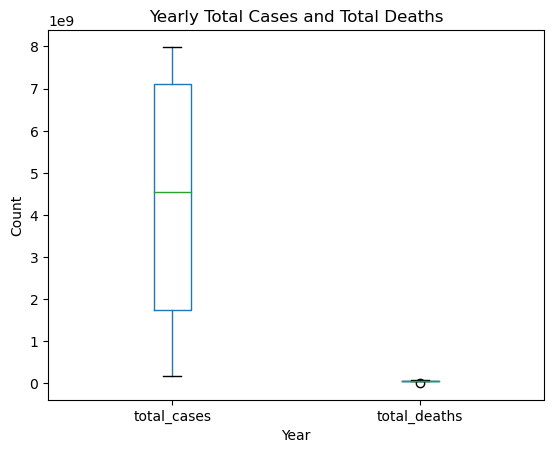

In [25]:
yearly_data.boxplot(column=['total_cases','total_deaths'], grid=False)
plt.title('Yearly Total Cases and Total Deaths')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

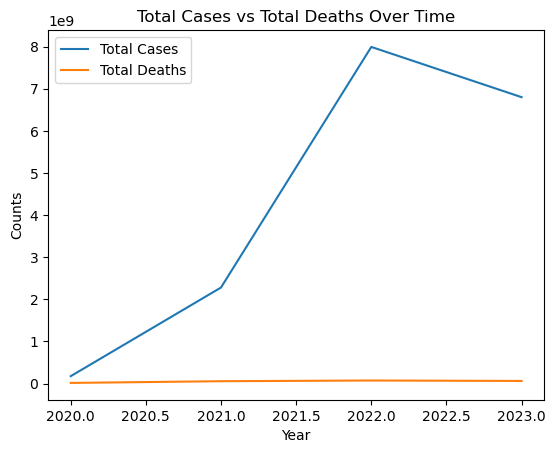

In [40]:
# line plots usibg seaborn and matplotlib

sns.lineplot(yearly_data, x='year', y='total_cases', label='Total Cases')
sns.lineplot(yearly_data, x='year', y='total_deaths', label='Total Deaths')

plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Total Cases vs Total Deaths Over Time')
plt.legend()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


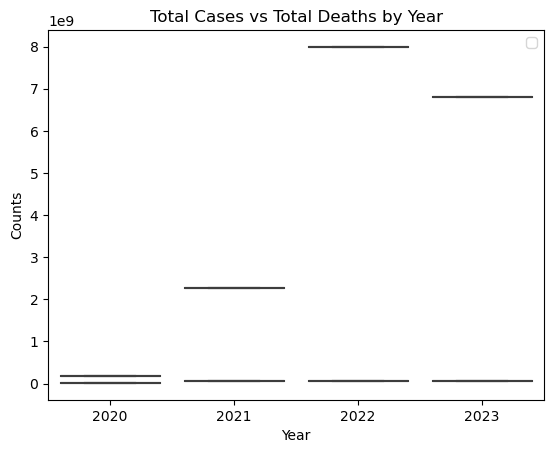

In [48]:
# box plot to compare the total cases and deaths for different years

sns.boxplot(yearly_data, x='year', y='total_cases')
sns.boxplot(yearly_data, x='year', y='total_deaths')

plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Total Cases vs Total Deaths by Year')
plt.legend()
plt.show()

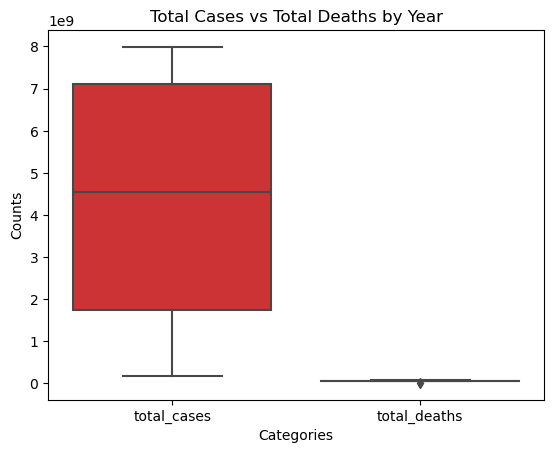

In [46]:
# box plot to compare the total cases and deaths for different years
# yearly_data is already aggregated data with 'year' as the index, so no need to specify 'x' and 'y' for sns.boxplot. 
#Instead, simply specify the data and the columns to be plotted.

sns.boxplot(data=yearly_data[['total_cases', 'total_deaths']], palette="Set1")
            
plt.xlabel('Categories')
plt.ylabel('Counts')
plt.title('Total Cases vs Total Deaths by Year')
plt.show()

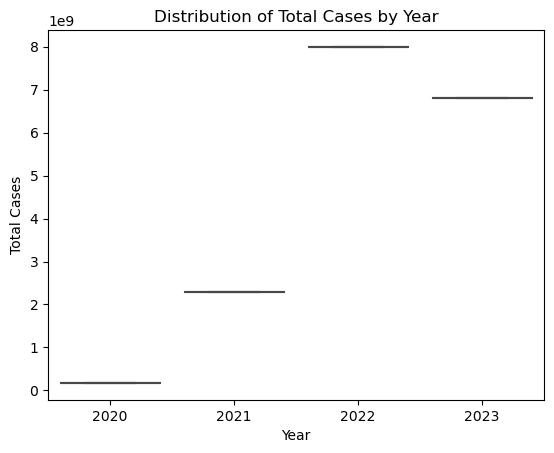

In [45]:
sns.boxplot(yearly_data, x='year', y='total_cases', palette="Set1")
            
plt.xlabel('Year')
plt.ylabel('Total Cases')
plt.title('Distribution of Total Cases by Year')
plt.show()

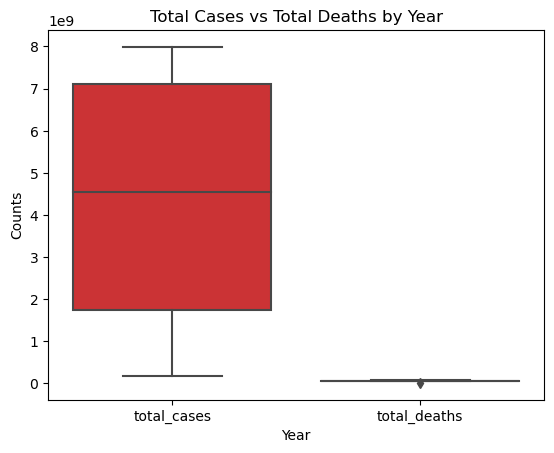

In [42]:
sns.boxplot(data=yearly_data, palette="Set1")
            
plt.xlabel('Year')
plt.ylabel('Counts')
plt.title('Total Cases vs Total Deaths by Year')
plt.show()

In [49]:
# Time series analysis
# Set Seaborn Theme

sns.set_theme()

In [54]:
#Extract the year from the date
df_death_cases['year']= df_death_cases['date'].dt.year

# Extract the month from the date
df_death_cases['month']= df_death_cases['date'].dt.month

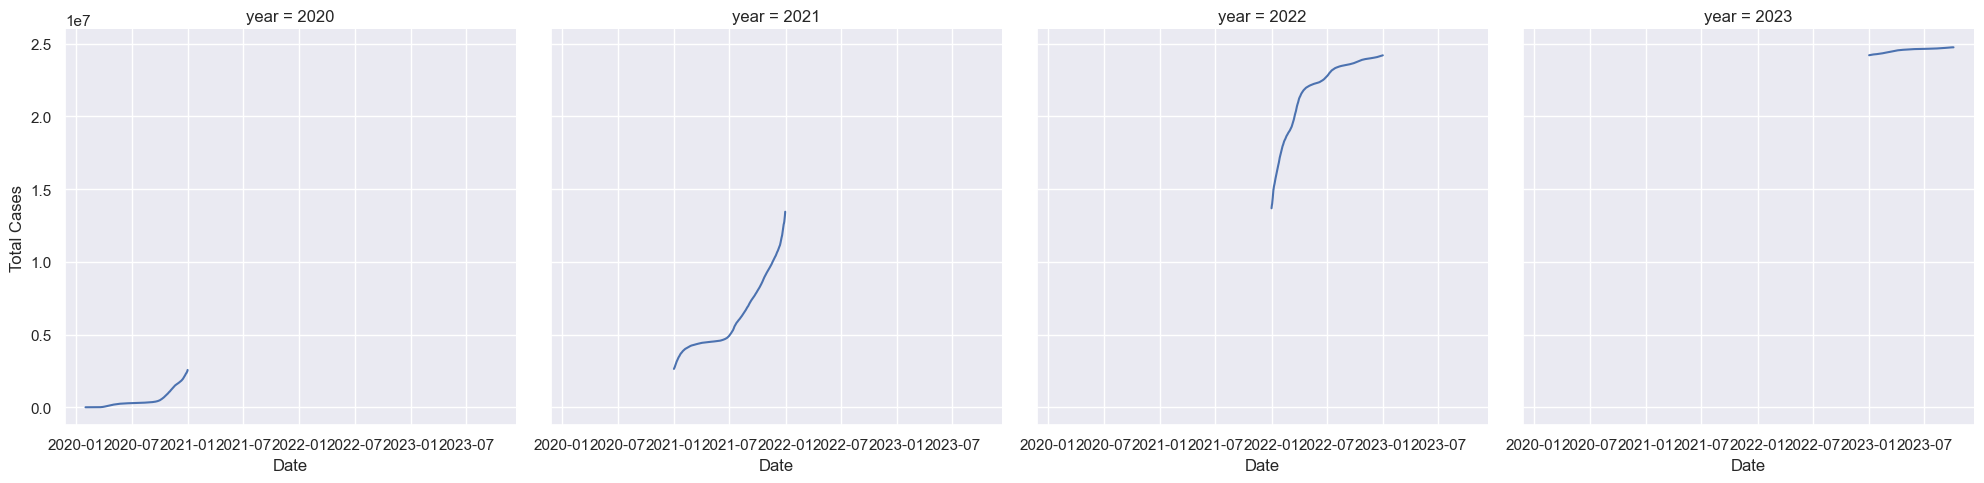

In [52]:
# create a facet grid of line plots for each year
grid_total_cases = sns.relplot(df_death_cases, x='date', y='total_cases', col='year', kind='line')
grid_total_cases.set_axis_labels('Date','Total Cases')
        
plt.show()

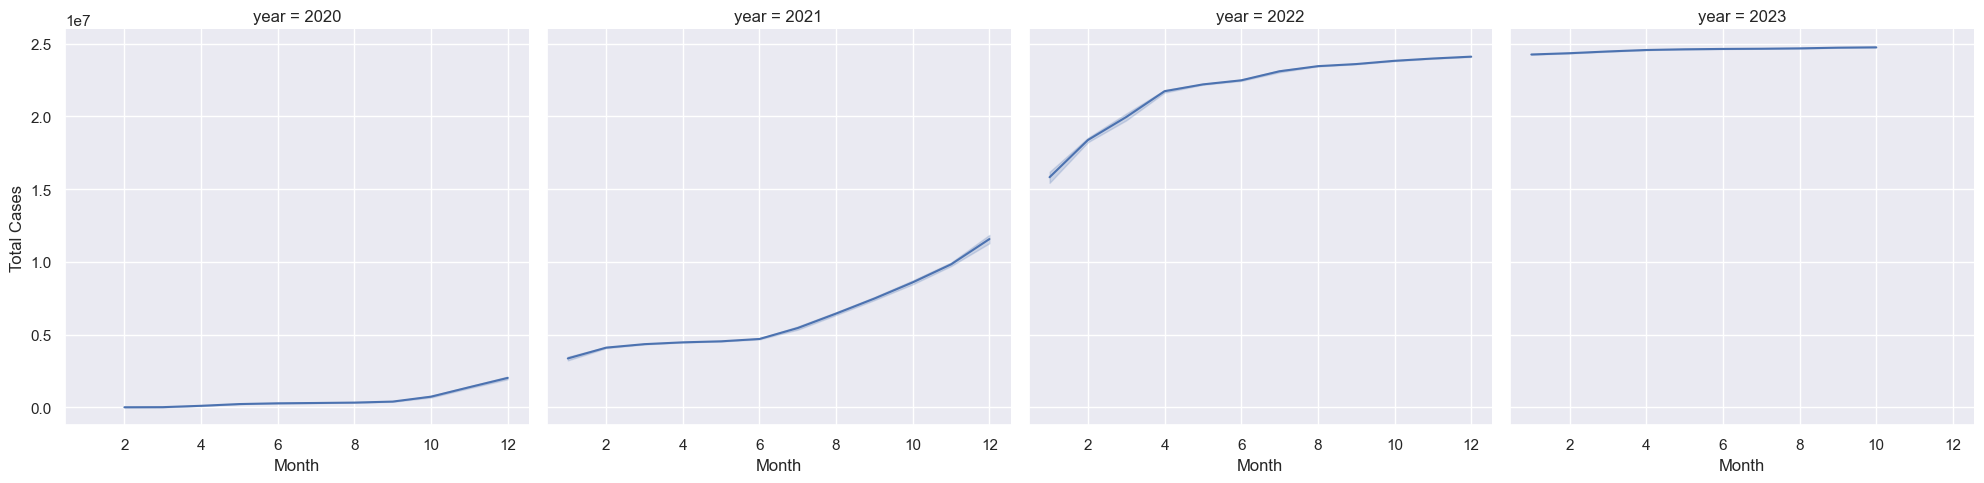

In [57]:
# modify further
grid_total_cases = sns.relplot(df_death_cases, x='month', y='total_cases', col='year', kind='line')
grid_total_cases.set_axis_labels('Month','Total Cases')
        
plt.show()

<Figure size 640x480 with 0 Axes>

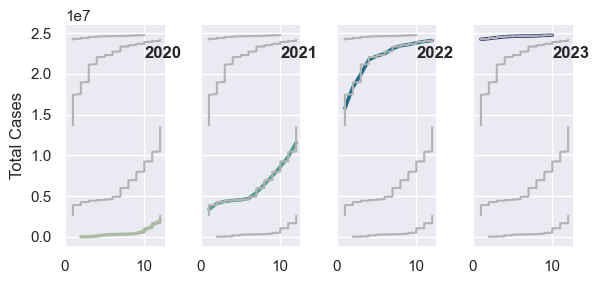

In [85]:
# define ax_cases before the loop
# this helps to make it accessible when setting up 
#...x-axis ticks and tweaking the supporting aspects of the plot
#  i.e., ensure ax_cases is accessible after the loop completion
# if ax_cases is defined inside the loop, then the scope will
#...be limited and you would lose access to the ax_cases object
ax_cases = None



# modify further
grid_total_cases = sns.relplot(df_death_cases, x='month', y='total_cases', col='year', hue='year',
                               kind='line', palette = 'crest', linewidth=2.5, zorder=1,
                              col_wrap=4, height=3, aspect=0.5, legend=False)
grid_total_cases.set_axis_labels('Month','Total Cases')

# iterate over each subplot to customise further
# define ax_cases
for year, ax_cases in grid_total_cases.axes_dict.items():

    #Add the title as an annotation within the plot
    ax_cases.text(.8, .85, year, transform=ax_cases.transAxes, fontweight="bold")
    
    # Plot every year's time series in the background
    sns.lineplot(
        df_death_cases, x='month', y='total_cases', units='year',
        estimator=None, color='.7', linewidth=1.5, ax=ax_cases,
    )
 
# Reduce the frequency of the x axis ticks
ax_cases.set_xticks(ax_cases.get_xticks()[::2])

# tweak the supporting aspects of the plot
grid_total_cases.set_titles("")
grid_total_cases.set_axis_labels("", "Total Cases")
grid_total_cases.tight_layout()

plt.show()

In [84]:
import os
plt.savefig("grid_total_cases.png")
os.listdir()


['.ipynb_checkpoints',
 'BackupFiles.zip',
 'copy.csv',
 'copytext.txt',
 'Covid Project - preprocessing csv files.ipynb',
 'CovidDeaths.csv',
 'CovidDeaths.xlsx',
 'CovidDeaths_1.csv',
 'CovidDeaths_2.csv',
 'CovidDeaths_2020_2023.csv',
 'CovidDeaths_2020_2023_SQL.csv',
 'CovidDeaths_barplot.csv',
 'CovidDeaths_preprocessed.csv',
 'CovidDeaths_timeseries_plot.csv',
 'CovidDeaths_totalcases_vs_death.csv',
 'CovidDeaths_totalcases_vs_population.csv',
 'CovidDea_Vac.csv',
 'CovidVaccinations.xlsx',
 'Covid_Project.sql',
 'covid_project_data.csv',
 'Covid_Vacs_2020_2023_SQL.csv',
 'Covid_Vacs_SQL.csv',
 'Customer.csv',
 'Death_percentage.csv',
 'grid_total_cases.png',
 'macrofauna.csv',
 'owid-covid-data.csv',
 'PG_16_202307071',
 'Product.csv',
 'Sales.csv',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace - Copy.sql',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace.sql',
 'SQL_masterclass_workspace1.sql',
 'Student.csv',
 'Supermart_DB.tar',
 'test_covid_deaths_qu

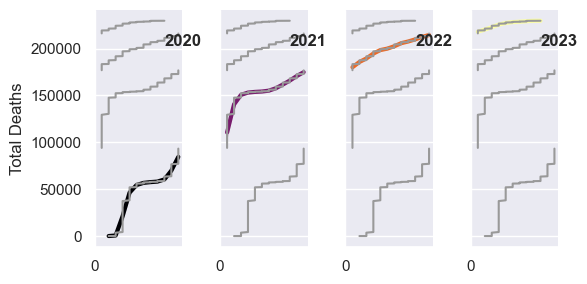

In [90]:
# define ax_cases before the loop
# this helps to make it accessible when setting up 
#...x-axis ticks and tweaking the supporting aspects of the plot
#  i.e., ensure ax_cases is accessible after the loop completion
# if ax_cases is defined inside the loop, then the scope will
#...be limited and you would lose access to the ax_cases object
ax_deaths = None



# modify further
grid_deaths = sns.relplot(df_death_cases, x='month', y='total_deaths', col='year', hue='year',
                               kind='line', palette = 'inferno', linewidth=3.0, zorder=1,
                              col_wrap=4, height=3, aspect=0.5, legend=False)
grid_deaths.set_axis_labels('Month','Total Deaths')

# iterate over each subplot to customise further
# define ax_cases
for year, ax_deaths in grid_deaths.axes_dict.items():

    #Add the title as an annotation within the plot
    ax_deaths.text(.8, .85, year, transform=ax_deaths.transAxes, fontweight="bold")
    
    # Plot every year's time series in the background
    sns.lineplot(
        df_death_cases, x='month', y='total_deaths', units='year',
        estimator=None, color='.6', linewidth=1.5, ax=ax_deaths,
    )
 
# Reduce the frequency of the x axis ticks
ax_deaths.set_xticks(ax_cases.get_xticks()[::2])

# tweak the supporting aspects of the plot
grid_deaths.set_titles("")
grid_deaths.set_axis_labels("", "Total Deaths")
grid_deaths.tight_layout()

plt.show()

In [91]:
plt.savefig("grid_total_deaths.png")
os.listdir()

['.ipynb_checkpoints',
 'BackupFiles.zip',
 'copy.csv',
 'copytext.txt',
 'Covid Project - preprocessing csv files.ipynb',
 'CovidDeaths.csv',
 'CovidDeaths.xlsx',
 'CovidDeaths_1.csv',
 'CovidDeaths_2.csv',
 'CovidDeaths_2020_2023.csv',
 'CovidDeaths_2020_2023_SQL.csv',
 'CovidDeaths_barplot.csv',
 'CovidDeaths_preprocessed.csv',
 'CovidDeaths_timeseries_plot.csv',
 'CovidDeaths_totalcases_vs_death.csv',
 'CovidDeaths_totalcases_vs_population.csv',
 'CovidDea_Vac.csv',
 'CovidVaccinations.xlsx',
 'Covid_Project.sql',
 'covid_project_data.csv',
 'Covid_Vacs_2020_2023_SQL.csv',
 'Covid_Vacs_SQL.csv',
 'Customer.csv',
 'Death_percentage.csv',
 'grid_total_cases.png',
 'grid_total_deaths.png',
 'macrofauna.csv',
 'owid-covid-data.csv',
 'PG_16_202307071',
 'Product.csv',
 'Sales.csv',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace - Copy.sql',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace.sql',
 'SQL_masterclass_workspace1.sql',
 'Student.csv',
 'Supermart_DB.ta

In [92]:
df_death_cases.describe()

,total_cases,total_deaths,death_percentage,year,month
count,1.342000e+03,1342.000000,1342.000000,1371.000000,1371.000000
mean,1.285286e+07,154592.634873,0.298063,2021.404814,6.240700
std,1.019257e+07,69318.402452,5.453401,1.084842,3.347138
min,1.000000e+00,1.000000,0.000000,2020.000000,1.000000
25%,2.649209e+06,94282.500000,0.000000,2020.000000,3.000000
50%,1.055918e+07,173149.000000,0.000000,2021.000000,6.000000
75%,2.393175e+07,211675.750000,0.000000,2022.000000,9.000000
max,2.474379e+07,229765.000000,100.000000,2023.000000,12.000000


In [94]:
# Global cases

df_dea_cases_pops = pd.read_csv('CovidDeaths_2020_2023_SQL.csv')

In [96]:
df_dea_cases_pops.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,population
0,OWID_ASI,NaN,Asia,10/10/2023,NaN,NaN,NaN,4721383370
1,BGD,Asia,Bangladesh,10/10/2023,NaN,NaN,NaN,171186368
2,BGR,Europe,Bulgaria,10/10/2023,NaN,NaN,NaN,6781955
3,HRV,Europe,Croatia,10/10/2023,NaN,NaN,NaN,4030361
4,CZE,Europe,Czechia,10/10/2023,NaN,NaN,NaN,10493990


In [97]:
# check how many continents before we can aggregate

num_continents = df_dea_cases_pops['continent'].nunique()
print(f'Number of unique continents: {num_continents}')

Number of unique continents: 6


In [99]:
# reformat (1) date, (2) extract month and year, (3) create a new dataframe to aggregate
df_dea_cases_pops['date'] = pd.to_datetime(df_dea_cases_pops['date'])
print(df_dea_cases_pops['date'].dtypes)
df_dea_cases_pops['year'] = df_dea_cases_pops['date'].dt.year
df_dea_cases_pops['month'] = df_dea_cases_pops['date'].dt.month

datetime64[ns]


In [124]:
# Create a new DataFrame to aggregate cases by continent, year and month
df_cases_by_continent = df_dea_cases_pops.groupby(['continent', 'month','year']).agg({'new_cases': 'sum', 'total_deaths': 'sum'}).reset_index()

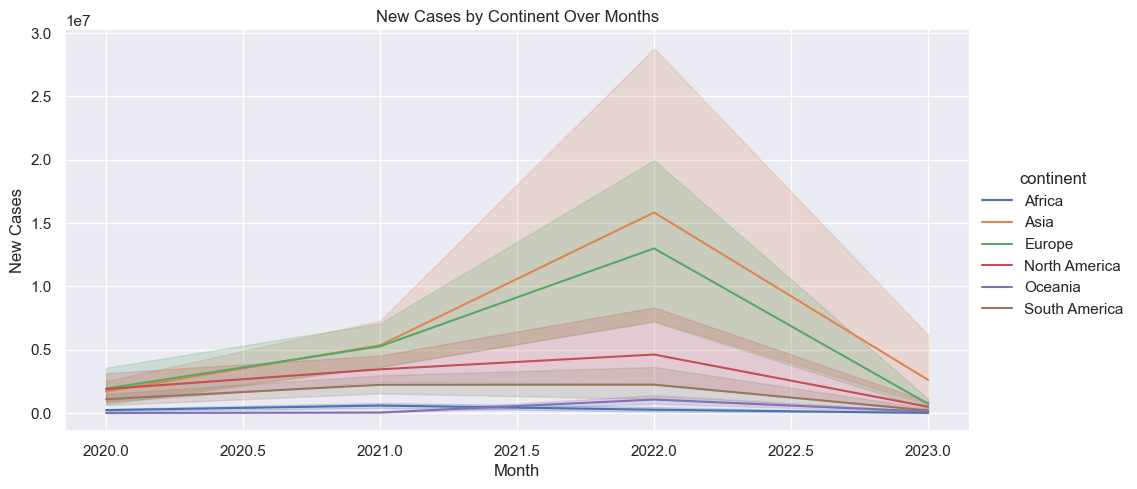

In [110]:
# set the seaborn style
sns.set_theme(style='darkgrid')

grid_global_cases = sns.relplot(df_cases_by_continent, x='year', y='new_cases',
                               hue='continent', kind='line', height=5, aspect=2)

plt.title("New Cases by Continent Over Months")
plt.xlabel("Month")
plt.ylabel("New Cases")

plt.show()

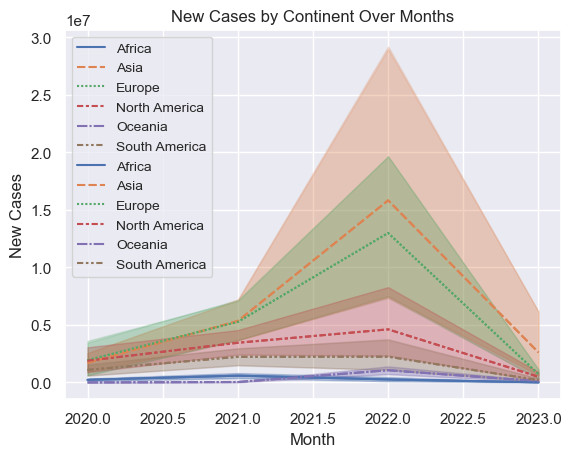

In [121]:
#  seaborn line plot graph style wtih error bands
sns.set_theme(style='darkgrid')

grid_global_cases = sns.lineplot(df_cases_by_continent, x='year', y='new_cases',
                               hue='continent', style='continent')

plt.title("New Cases by Continent Over Months")
plt.xlabel("Month")
plt.ylabel("New Cases")
plt.legend(fontsize="small")

plt.show()

In [122]:
plt.savefig("grid_global_cases.png")
os.listdir()

['.ipynb_checkpoints',
 'BackupFiles.zip',
 'copy.csv',
 'copytext.txt',
 'Covid Project - preprocessing csv files.ipynb',
 'CovidDeaths.csv',
 'CovidDeaths.xlsx',
 'CovidDeaths_1.csv',
 'CovidDeaths_2.csv',
 'CovidDeaths_2020_2023.csv',
 'CovidDeaths_2020_2023_SQL.csv',
 'CovidDeaths_barplot.csv',
 'CovidDeaths_preprocessed.csv',
 'CovidDeaths_timeseries_plot.csv',
 'CovidDeaths_totalcases_vs_death.csv',
 'CovidDeaths_totalcases_vs_population.csv',
 'CovidDea_Vac.csv',
 'CovidVaccinations.xlsx',
 'Covid_Project.sql',
 'covid_project_data.csv',
 'Covid_Vacs_2020_2023_SQL.csv',
 'Covid_Vacs_SQL.csv',
 'Customer.csv',
 'Death_percentage.csv',
 'grid_global_cases.png',
 'grid_total_cases.png',
 'grid_total_deaths.png',
 'macrofauna.csv',
 'owid-covid-data.csv',
 'PG_16_202307071',
 'Product.csv',
 'Sales.csv',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace - Copy.sql',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace.sql',
 'SQL_masterclass_workspace1.sql',
 'Stude

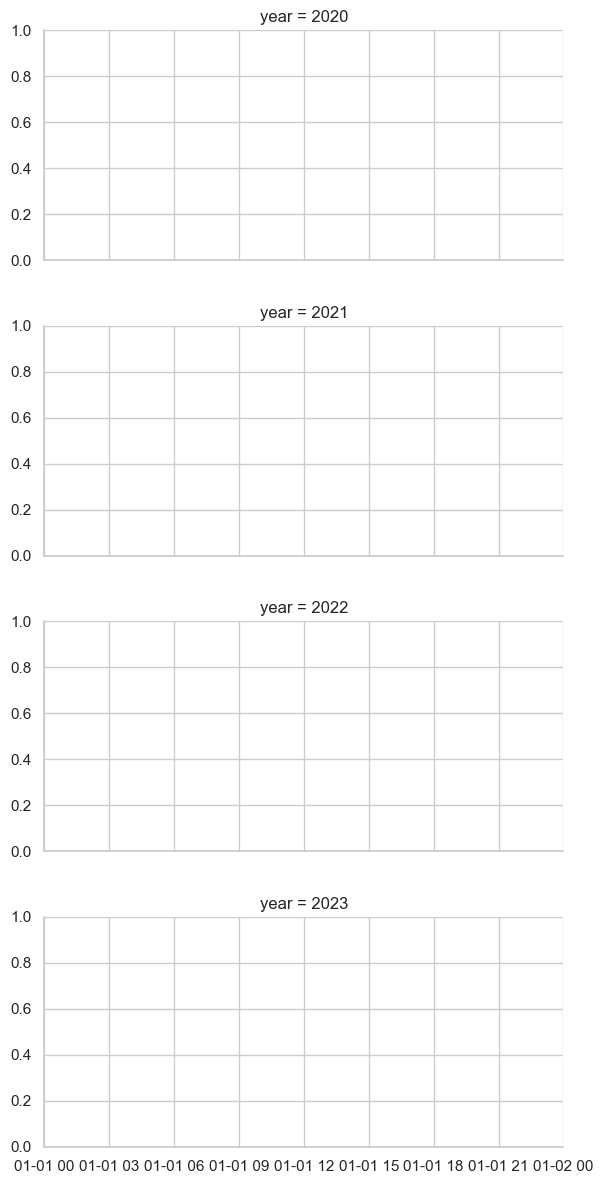

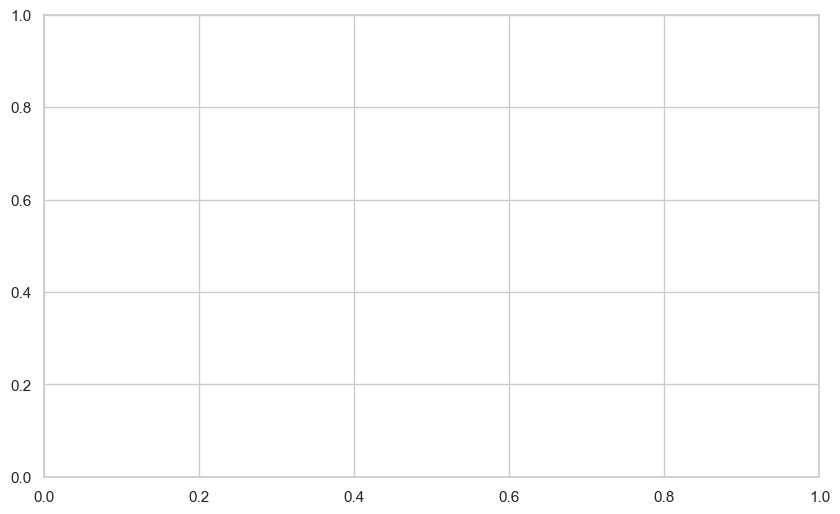

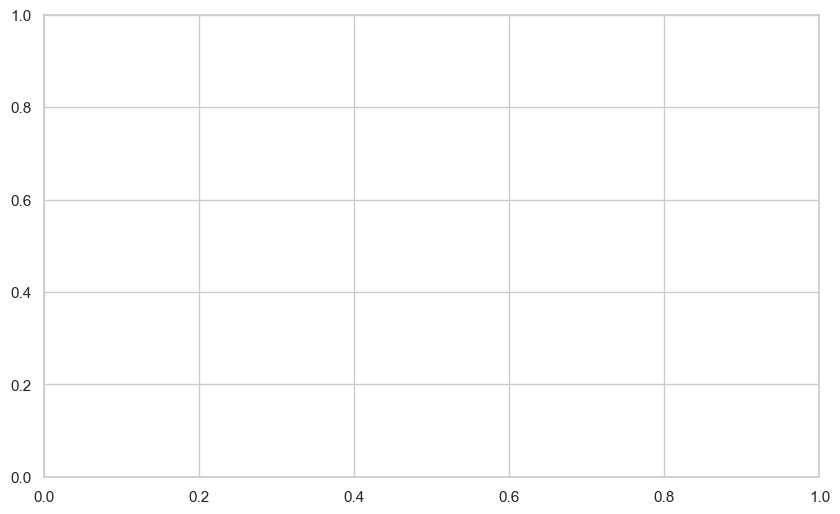

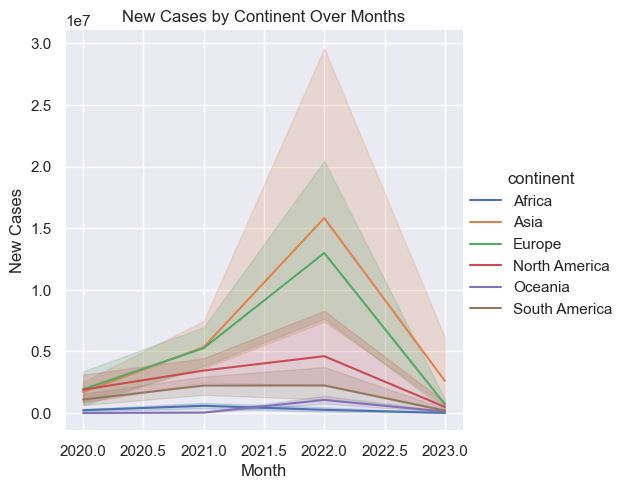

In [203]:
# set the seaborn style
sns.set_theme(style='darkgrid')

grid_global_cases = sns.relplot(df_cases_by_continent, x='year', y='new_cases',
                               hue='continent', kind='line')

plt.title("New Cases by Continent Over Months")
plt.xlabel("Month")
plt.ylabel("New Cases")

plt.show()

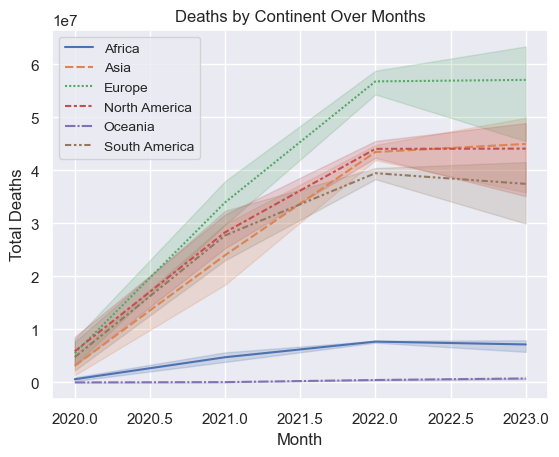

In [126]:
#  seaborn line plot graph style wtih error bands
sns.set_theme(style='darkgrid')

grid_global_cases = sns.lineplot(df_cases_by_continent, x='year', y='total_deaths',
                               hue='continent', style='continent')

plt.title("Deaths by Continent Over Months")
plt.xlabel("Month")
plt.ylabel("Total Deaths")
plt.legend(fontsize="small")

plt.show()

In [127]:
plt.savefig("grid_global_deaths.png")
os.listdir()

['.ipynb_checkpoints',
 'BackupFiles.zip',
 'copy.csv',
 'copytext.txt',
 'Covid Project - preprocessing csv files.ipynb',
 'CovidDeaths.csv',
 'CovidDeaths.xlsx',
 'CovidDeaths_1.csv',
 'CovidDeaths_2.csv',
 'CovidDeaths_2020_2023.csv',
 'CovidDeaths_2020_2023_SQL.csv',
 'CovidDeaths_barplot.csv',
 'CovidDeaths_preprocessed.csv',
 'CovidDeaths_timeseries_plot.csv',
 'CovidDeaths_totalcases_vs_death.csv',
 'CovidDeaths_totalcases_vs_population.csv',
 'CovidDea_Vac.csv',
 'CovidVaccinations.xlsx',
 'Covid_Project.sql',
 'covid_project_data.csv',
 'Covid_Vacs_2020_2023_SQL.csv',
 'Covid_Vacs_SQL.csv',
 'Customer.csv',
 'Death_percentage.csv',
 'grid_global_cases.png',
 'grid_global_deaths.png',
 'grid_total_cases.png',
 'grid_total_deaths.png',
 'macrofauna.csv',
 'owid-covid-data.csv',
 'PG_16_202307071',
 'Product.csv',
 'Sales.csv',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace - Copy.sql',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace.sql',
 'SQL_mastercla

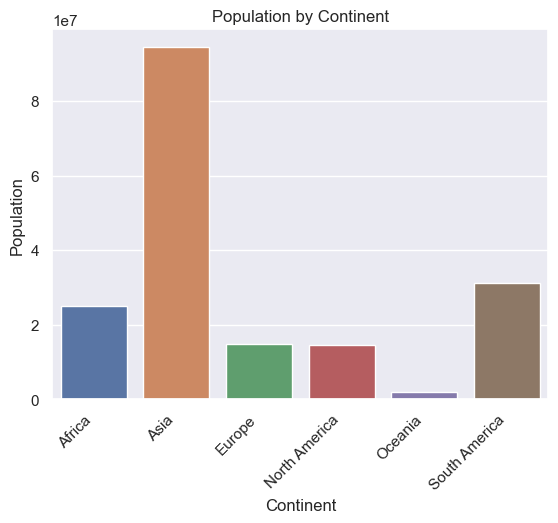

In [140]:
# assuming you already have df_dea_cases_pops and df_cases_by_continent
# merge population data into df_pop_by_continent

df_pop_by_continent = df_cases_by_continent.merge(df_dea_cases_pops[['continent','population']], on='continent')

sns.set_theme(style='darkgrid')

sns.barplot(df_pop_by_continent, x='continent', y='population', errorbar=None)

plt.title("Population by Continent")
plt.xlabel("Continent")
plt.ylabel("Population")

plt.xticks(rotation=45, ha='right')

plt.show()

In [141]:
plt.savefig("grid_global_population.png")
os.listdir()

['.ipynb_checkpoints',
 'BackupFiles.zip',
 'copy.csv',
 'copytext.txt',
 'Covid Project - preprocessing csv files.ipynb',
 'CovidDeaths.csv',
 'CovidDeaths.xlsx',
 'CovidDeaths_1.csv',
 'CovidDeaths_2.csv',
 'CovidDeaths_2020_2023.csv',
 'CovidDeaths_2020_2023_SQL.csv',
 'CovidDeaths_barplot.csv',
 'CovidDeaths_preprocessed.csv',
 'CovidDeaths_timeseries_plot.csv',
 'CovidDeaths_totalcases_vs_death.csv',
 'CovidDeaths_totalcases_vs_population.csv',
 'CovidDea_Vac.csv',
 'CovidVaccinations.xlsx',
 'Covid_Project.sql',
 'covid_project_data.csv',
 'Covid_Vacs_2020_2023_SQL.csv',
 'Covid_Vacs_SQL.csv',
 'Customer.csv',
 'Death_percentage.csv',
 'grid_global_cases.png',
 'grid_global_deaths.png',
 'grid_global_population.png',
 'grid_total_cases.png',
 'grid_total_deaths.png',
 'macrofauna.csv',
 'owid-covid-data.csv',
 'PG_16_202307071',
 'Product.csv',
 'Sales.csv',
 'SQL_masterclass_SQL_for_data_analytics_query_or_workspace - Copy.sql',
 'SQL_masterclass_SQL_for_data_analytics_query_or_

In [142]:
# create a new data frame for vaccinations
df_vac = pd.read_csv('CovidDea_Vac.csv')

In [143]:
df_vac.describe()

,total_cases,new_cases,total_deaths,population,total_vaccinations,people_vaccinated,people_fully_vaccinated
count,5.848760e+05,6.411520e+05,5.421700e+05,6.602800e+05,1.339400e+05,1.271800e+05,1.208540e+05
mean,1.646322e+06,2.405768e+03,2.170719e+04,3.341937e+07,8.611150e+07,3.065133e+07,2.755686e+07
std,7.099421e+06,3.937188e+04,8.255753e+04,1.347667e+08,3.485593e+08,1.153232e+08,1.051692e+08
min,1.000000e+00,0.000000e+00,1.000000e+00,4.700000e+01,0.000000e+00,0.000000e+00,1.000000e+00
25%,7.305000e+03,0.000000e+00,1.190000e+02,3.957620e+05,1.262031e+06,6.767550e+05,6.230845e+05
50%,5.820650e+04,1.000000e+00,9.980000e+02,5.466000e+06,7.794123e+06,4.141962e+06,3.798153e+06
75%,5.388600e+05,1.660000e+02,8.622000e+03,2.212524e+07,3.806630e+07,1.899585e+07,1.767742e+07
max,1.034368e+08,6.966046e+06,1.127152e+06,1.425887e+09,3.491077e+09,1.310292e+09,1.276760e+09


In [ ]:
ax_cases = None



# modify further
grid_total_cases = sns.relplot(df_death_cases, x='month', y='total_cases', col='year', hue='year',
                               kind='line', palette = 'crest', linewidth=2.5, zorder=1,
                              col_wrap=4, height=3, aspect=0.5, legend=False)
grid_total_cases.set_axis_labels('Month','Total Cases')

# iterate over each subplot to customise further
# define ax_cases
for year, ax_cases in grid_total_cases.axes_dict.items():

    #Add the title as an annotation within the plot
    ax_cases.text(.8, .85, year, transform=ax_cases.transAxes, fontweight="bold")
    
    # Plot every year's time series in the background
    sns.lineplot(
        df_death_cases, x='month', y='total_cases', units='year',
        estimator=None, color='.7', linewidth=1.5, ax=ax_cases,
    )
 
# Reduce the frequency of the x axis ticks
ax_cases.set_xticks(ax_cases.get_xticks()[::2])

# tweak the supporting aspects of the plot
grid_total_cases.set_titles("")
grid_total_cases.set_axis_labels("", "Total Cases")
grid_total_cases.tight_layout()

plt.show()

In [146]:
# Time plot series for people_vaccinated and people_fully_vaccinated
# continent by continent each year
#Extract the year from the date
df_vac['date'] = pd.to_datetime(df_vac['date'])
df_vac['year']= df_vac['date'].dt.year
df_vac['month']= df_vac['date'].dt.month

In [167]:
grid_vac = sns.relplot(df_vac, x='month', y='people_fully_vaccinated', 
                       col='year', hue='continent', kind='line',
                      palette='crest', linewidth=2.5, zorder=1,
                      col_wrap=1, height=3, aspect=2.0, legend=True)

# Define the y-axis limits
y_min = 0
y_max = 0.4e9
# Set the y-axis limits on the grid
grid_vac.set(ylim=(y_min, y_max))

grid_vac.set_axis_labels('Month','Total Cases')

for year, ax_vac in grid_vac.axes_dict.items():
    ax_vac.text(.8, .95, year, transform=ax_vac.transAxes, fontweight='bold')
    
  
    sns.lineplot(
        df_vac, x='month', y='people_fully_vaccinated', units='year',
        estimator=None, color='.7', linewidth=1.5, ax=ax_vac,
    )
 

    ax_vac.set_xticks(ax_vac.get_xticks()[::1])

handles, labels = ax_vac.get_legend().get_legend_handles_labels()
ax_vac.legend_.remove()

grid_vac.fig.legend(handles, labels, loc='upper centre', ncol=len(handles))
grid_vac.set_titles("")
grid_vac.set_axis_labels("", "People Vaccinated")
grid_vac.tight_layout()


AttributeError: 'NoneType' object has no attribute 'get_legend_handles_labels'

In [ ]:
plt.show()

In [182]:
grid_vac = sns.relplot(df_vac, x='date', y='people_fully_vaccinated', 
                       col='year', kind='line', linewidth=2.5, zorder=1,
                      col_wrap=1, height=3, aspect=2.0, legend=True)

# Define the y-axis limits
y_min = 0
y_max = 0.4e9
# Set the y-axis limits on the grid
grid_vac.set(ylim=(y_min, y_max))

grid_vac.set_axis_labels('Month','Total Cases')
grid_vac.despine()
grid_vac.set_titles("")
grid_vac.set_axis_labels("", "People Vaccinated")
grid_vac.tight_layout()

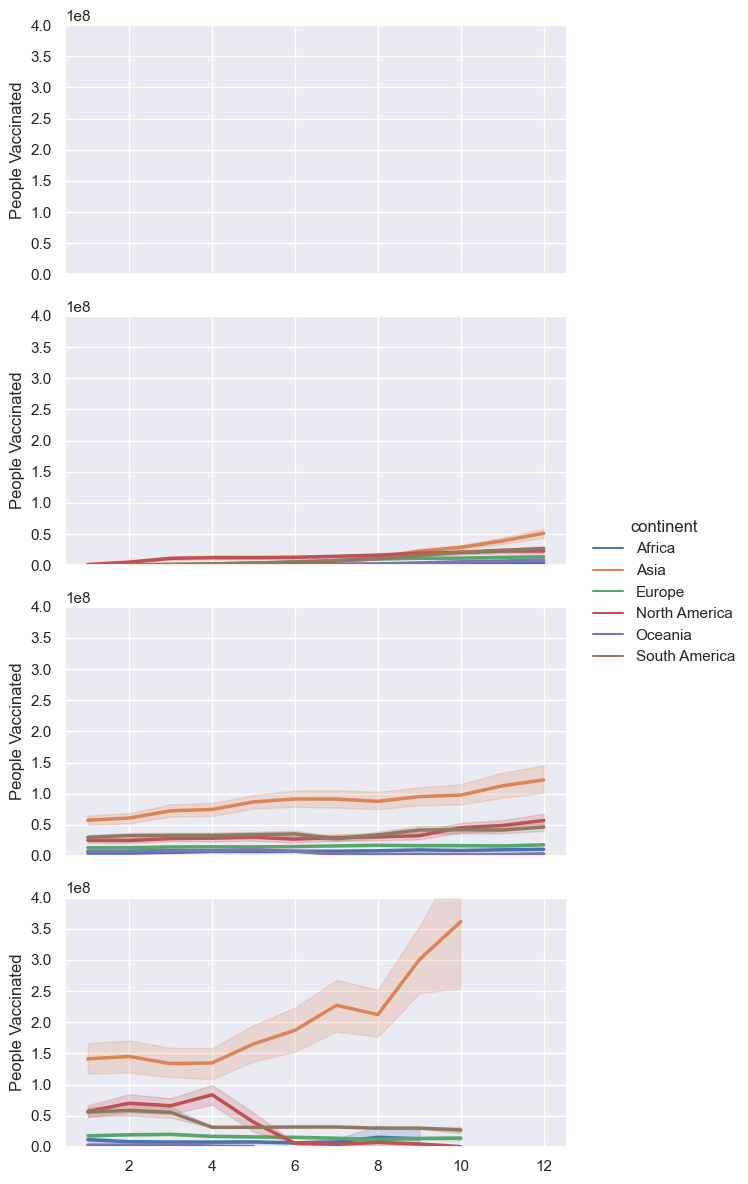

In [183]:
plt.show()

In [200]:
display(df_vac)


,iso_code,continent,location,date,total_cases,new_cases,total_deaths,population,iso_code.1,continent.1,location.1,date.1,total_vaccinations,people_vaccinated,people_fully_vaccinated,year,month
0,DZA,Africa,Algeria,2020-01-03,NaN,0.0,NaN,44903228,DZA,Africa,Algeria,2020-01-03,NaN,NaN,NaN,2020,1
1,DZA,Africa,Algeria,2020-01-04,NaN,0.0,NaN,44903228,DZA,Africa,Algeria,2020-01-04,NaN,NaN,NaN,2020,1
2,DZA,Africa,Algeria,2020-01-05,NaN,0.0,NaN,44903228,DZA,Africa,Algeria,2020-01-05,NaN,NaN,NaN,2020,1
3,DZA,Africa,Algeria,2020-01-06,NaN,0.0,NaN,44903228,DZA,Africa,Algeria,2020-01-06,NaN,NaN,NaN,2020,1
4,DZA,Africa,Algeria,2020-01-07,NaN,0.0,NaN,44903228,DZA,Africa,Algeria,2020-01-07,NaN,NaN,NaN,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660275,VEN,South America,Venezuela,2023-09-30,552695.0,0.0,5856.0,28301700,VEN,South America,Venezuela,2023-09-30,NaN,NaN,NaN,2023,9
660276,VEN,South America,Venezuela,2023-10-01,552695.0,0.0,5856.0,28301700,VEN,South America,Venezuela,2023-10-01,NaN,NaN,NaN,2023,10
660277,VEN,South America,Venezuela,2023-10-02,552695.0,0.0,5856.0,28301700,VEN,South America,Venezuela,2023-10-02,NaN,NaN,NaN,2023,10
660278,VEN,South America,Venezuela,2023-10-03,552695.0,0.0,5856.0,28301700,VEN,South America,Venezuela,2023-10-03,NaN,NaN,NaN,2023,10


In [198]:
# Create a relplot with the filtered data
grid_vac = sns.relplot(uk_data, x='date', y='total_vaccinations', 
                       col='year', kind='line', linewidth=2.5, zorder=1,
                       col_wrap=1, height=3, aspect=2.0, legend=True)


# Additional plot customization, if needed
grid_vac.set_axis_labels('Month', 'People Vaccinated')
grid_vac.despine()
grid_vac.set_titles("")
grid_vac.set_axis_labels("", "People Vaccinated")
grid_vac.tight_layout()





KeyError: 'y'

In [190]:
uk_data = df_vac[df_vac['location'] == 'United Kingdom']

In [195]:
uk_data.head()

,iso_code,continent,location,date,total_cases,new_cases,total_deaths,population,iso_code.1,continent.1,location.1,date.1,total_vaccinations,people_vaccinated,people_fully_vaccinated,year,month
310714,GBR,Europe,United Kingdom,2020-01-03,NaN,0.0,NaN,67508936,GBR,Europe,United Kingdom,2020-01-03,NaN,NaN,NaN,2020,1
310715,GBR,Europe,United Kingdom,2020-01-04,NaN,0.0,NaN,67508936,GBR,Europe,United Kingdom,2020-01-04,NaN,NaN,NaN,2020,1
310716,GBR,Europe,United Kingdom,2020-01-05,NaN,0.0,NaN,67508936,GBR,Europe,United Kingdom,2020-01-05,NaN,NaN,NaN,2020,1
310717,GBR,Europe,United Kingdom,2020-01-06,NaN,0.0,NaN,67508936,GBR,Europe,United Kingdom,2020-01-06,NaN,NaN,NaN,2020,1
310718,GBR,Europe,United Kingdom,2020-01-07,NaN,0.0,NaN,67508936,GBR,Europe,United Kingdom,2020-01-07,NaN,NaN,NaN,2020,1


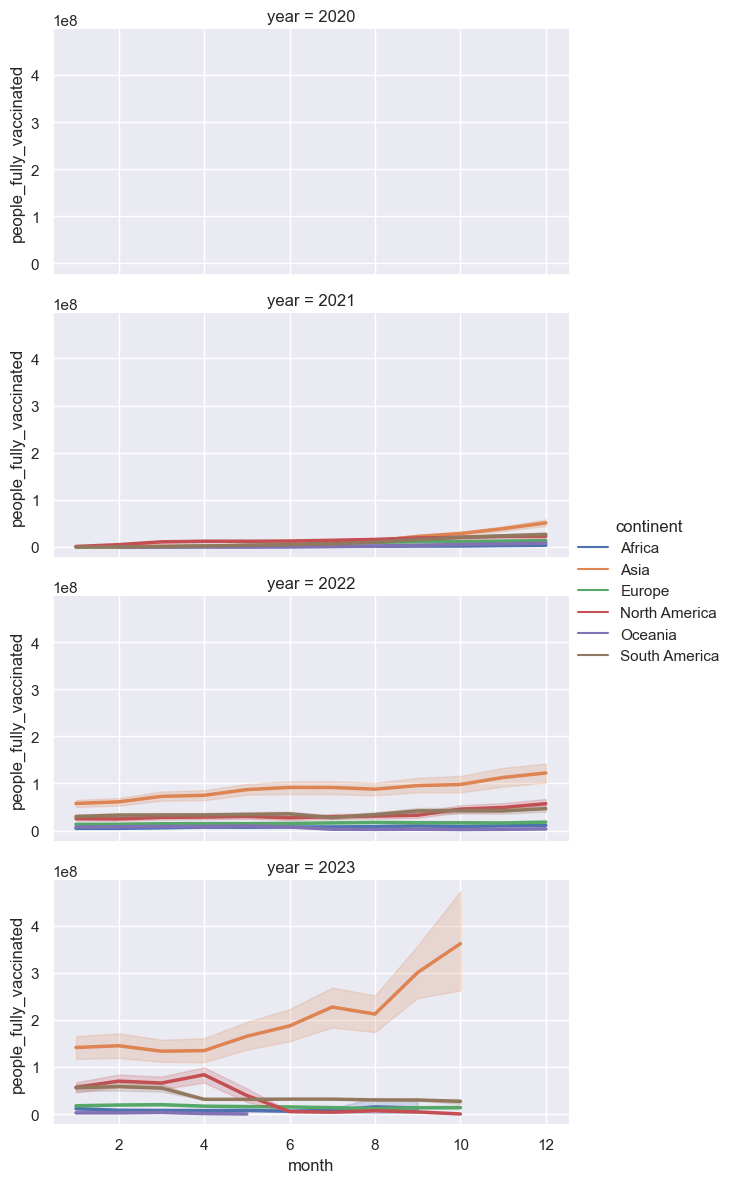

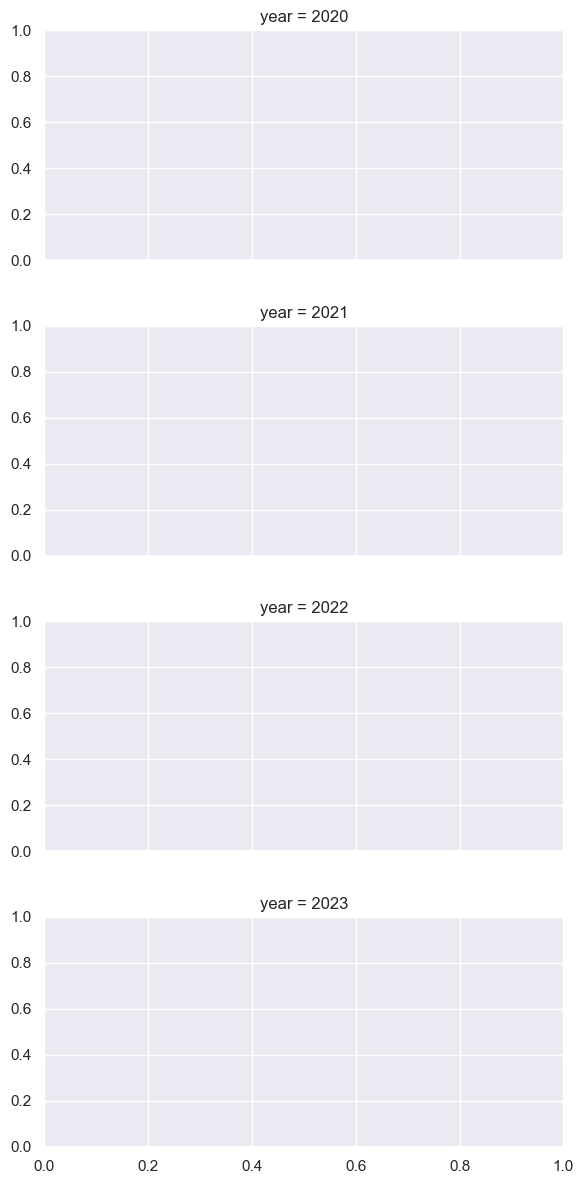

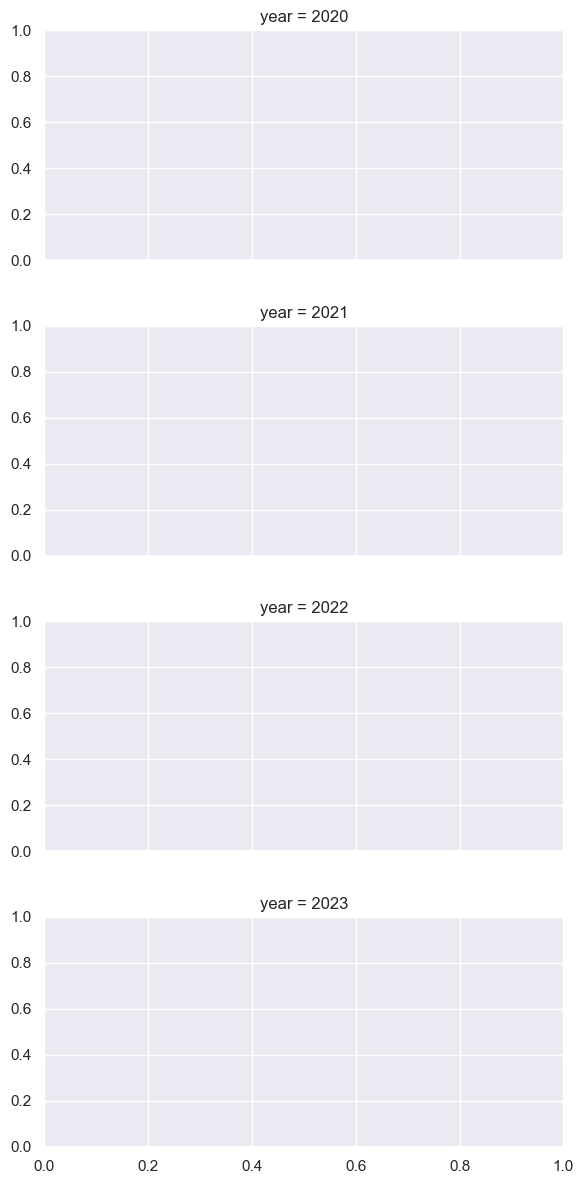

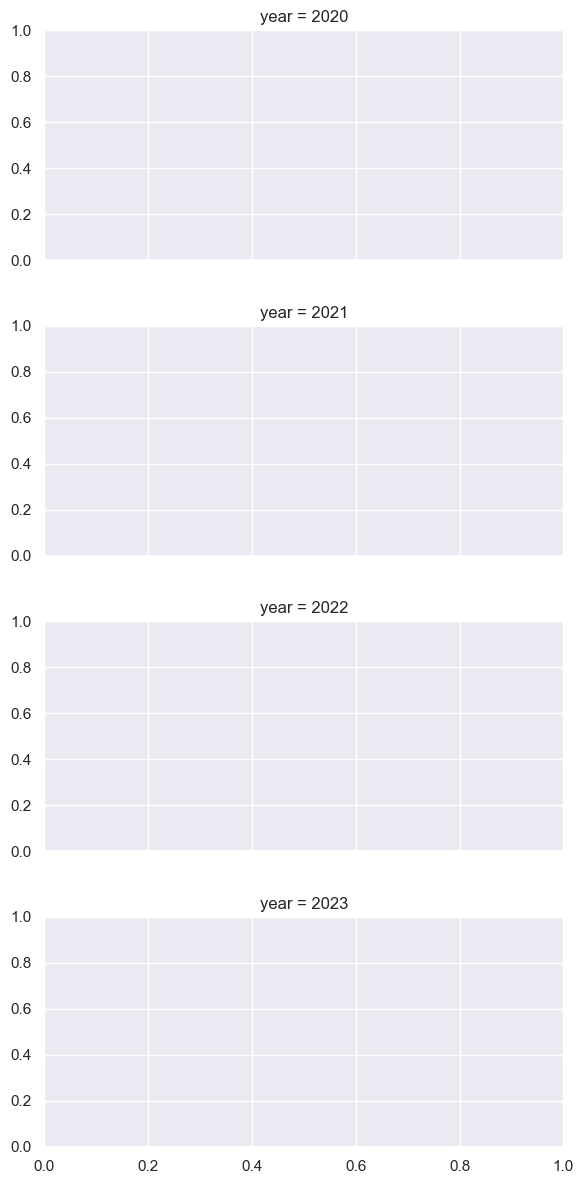

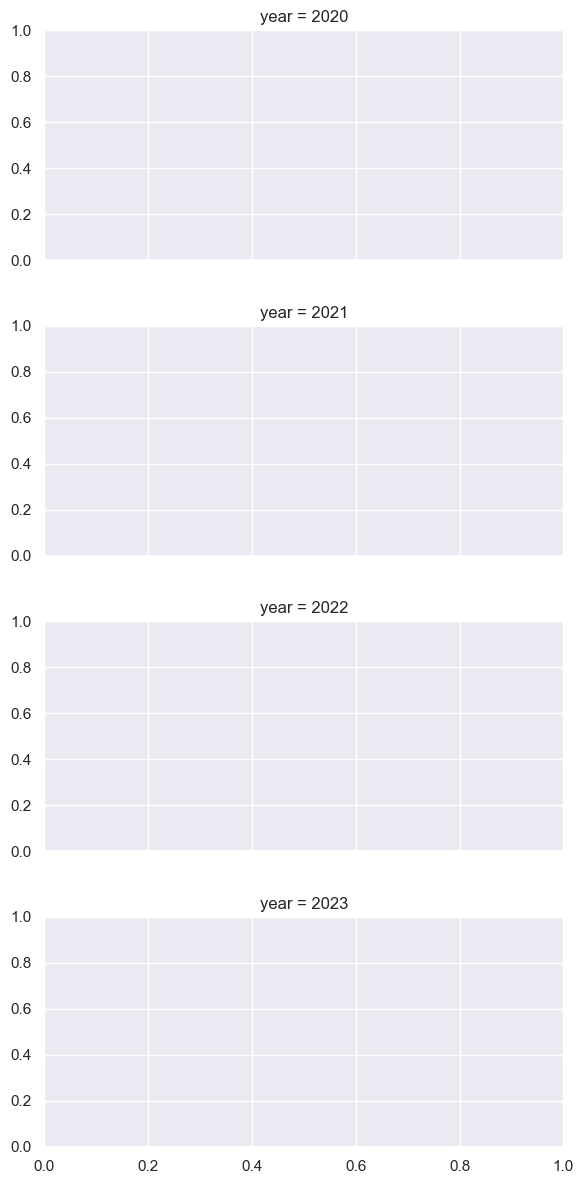

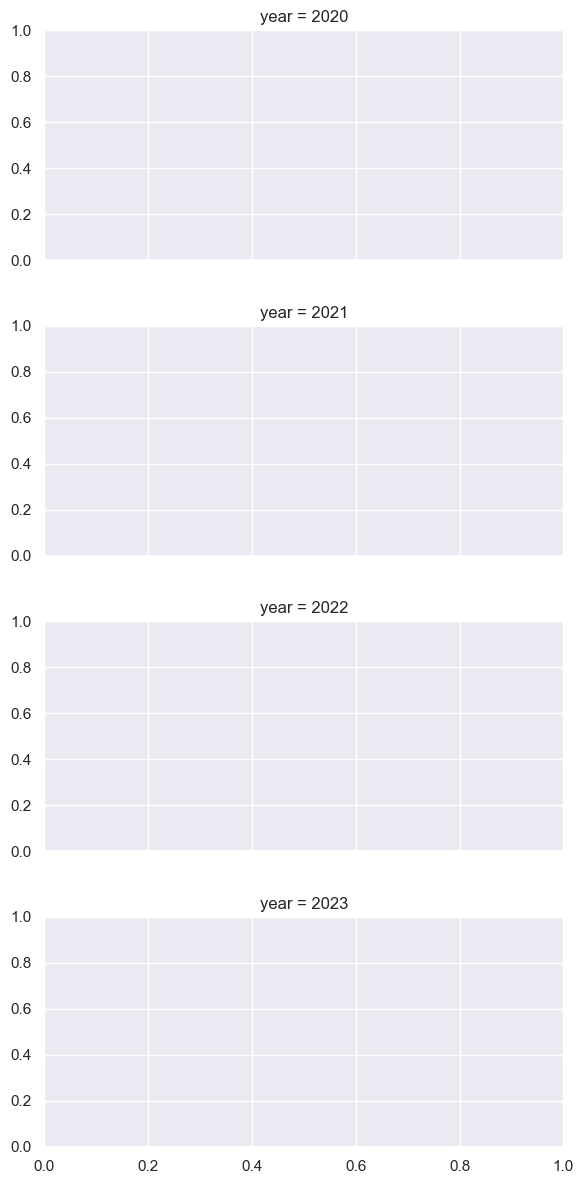

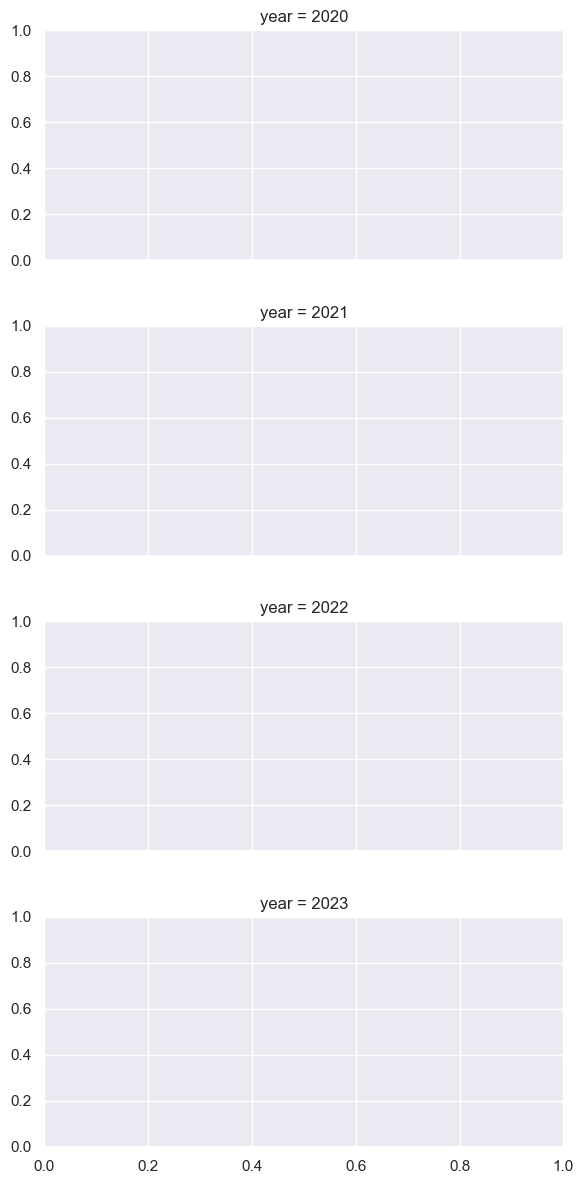

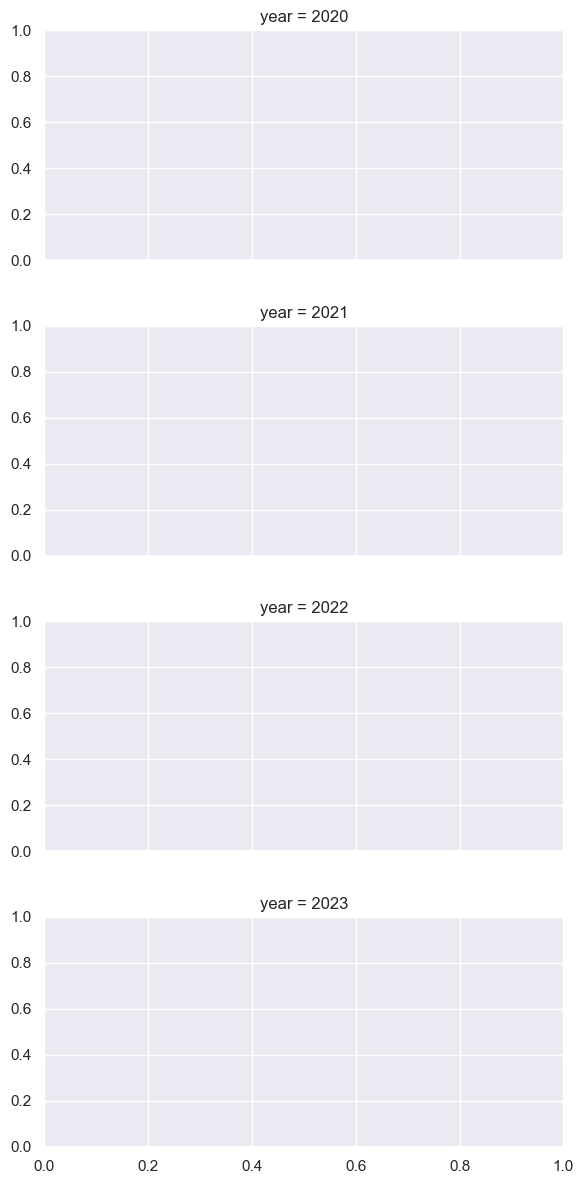

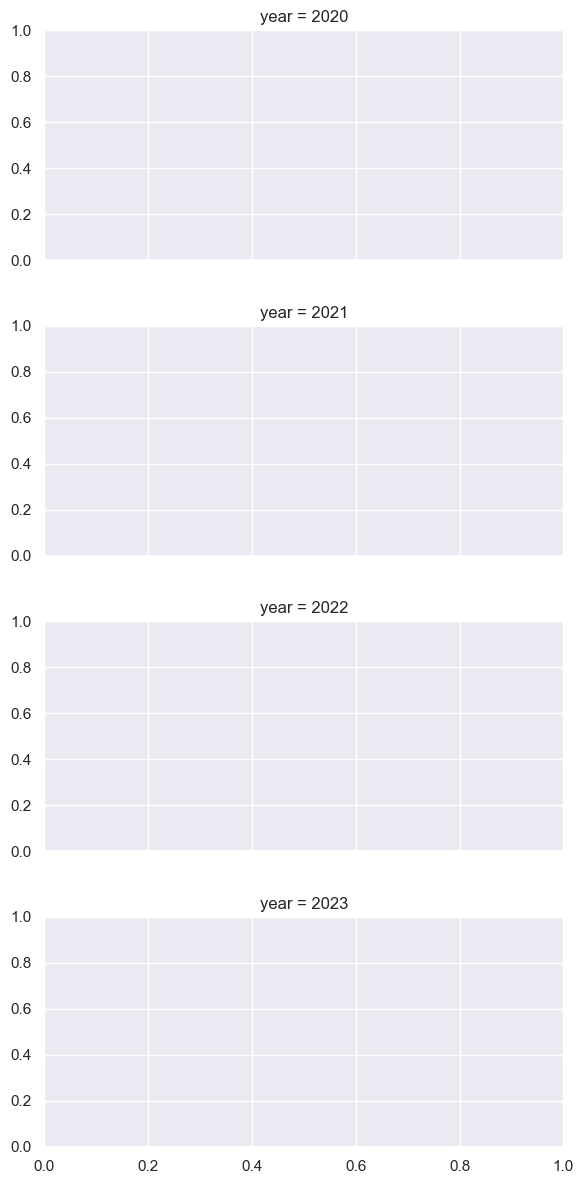

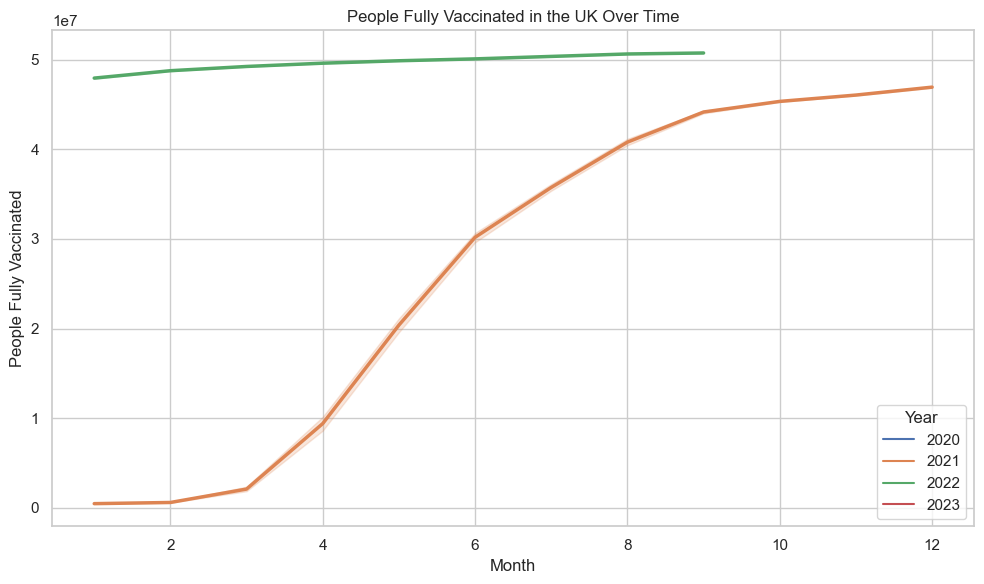

In [197]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=uk_data, x='month', y='people_fully_vaccinated', hue='year', palette='deep', linewidth=2.5)
plt.xlabel('Month')
plt.ylabel('People Fully Vaccinated')
plt.title('People Fully Vaccinated in the UK Over Time')
plt.legend(title='Year')
plt.tight_layout()
plt.show()

In [202]:
# Set the style
sns.set(style="whitegrid")

# Create a list of unique years in your data
years = uk_data['year'].unique()

# Create separate plots for each year
for year in years:
    plt.figure(figsize=(10, 6))
    data_year = uk_data[uk_data['year'] == year]
    
    sns.lineplot(data=data_year, x='month', y='total_vaccinations', palette='deep', linewidth=2.5)
    
    plt.xlabel('Month')
    plt.ylabel('People Fully Vaccinated')
    plt.title(f'People Fully Vaccinated in the UK in {year}')
    plt.tight_layout()
    plt.show()

C:\Users\digit\AppData\Local\Temp\ipykernel_16588\2829767349.py:12: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=data_year, x='month', y='total_vaccinations', palette='deep', linewidth=2.5)


KeyError: 'y'